<a href="https://colab.research.google.com/github/girisiman/Deep_Learning_Tasks/blob/master/AutoEncoder2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras.datasets.mnist as mnist
import keras
from keras.layers import Input
from keras.layers.core import Dense, Dropout
from keras.models import Model
from keras import optimizers
from keras import regularizers
import matplotlib.pyplot as plt
import numpy as np
from keras.wrappers.scikit_learn import  KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
import os
from sklearn.metrics import accuracy_score


Using TensorFlow backend.


In [0]:
def load_data():
  (x_train, y_train),  (x_test, y_test) = mnist.load_data()
  x_train = x_train.astype('float32') / 255.
  x_test = x_test.astype('float32') / 255.
  x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
  x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
  print(x_train.shape)
  print(x_test.shape)
  
  return x_train, x_test

  
  

In [4]:
x_train, x_test = load_data()

(60000, 784)
(10000, 784)


In [0]:
def add_noise(x_train, x_test):
  noise_factor = 0.5
  x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
  x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
  x_train_noisy = np.clip(x_train_noisy, 0., 1.)
  x_test_noisy = np.clip(x_test_noisy, 0., 1.)
  return x_train_noisy, x_test_noisy


In [0]:
x_train_noise, x_test_noise = add_noise(x_train, x_test)

In [0]:
def create_model(activation = 'relu', optimizer='adadelta', regularizer = regularizers.l1(10e-5), loss='binary_crossentropy' ):
  input_img = Input(shape = (784,))
  encoded = Dense(128, activation=activation)(input_img)
  encoded = Dense(64, activation=activation)(encoded)
  encoded = Dense(32, activation=activation)(encoded)
  
  decoded = Dense(64, activation=activation)(encoded)
  decoded = Dense(128, activation=activation)(decoded)
  # last decoded layer
  decoded = Dense(784, activation='sigmoid')(decoded)
  
  autoencoder = Model(input_img, decoded)
  autoencoder.compile(optimizer=optimizer, loss=loss)
  
  return autoencoder

  

  

In [0]:
def image_plot_test(x_test):
  n = 10  # how many digits we will display
  plt.figure(figsize=(20, 4))
  for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('Original Image')
  plt.show()

def image_plot_recon(pred_image):
  # display reconstruction
  n = 10  # how many digits we will display
  plt.figure(figsize=(20, 4))
  for i in range(n):
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(pred_image[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('ReconstructedImage')
  plt.show()
  

  
#ae_model = create_model()
#predicted_images = ae_model.predict(x_test)
#orig_image = image_plot_test(x_test)
#recon_image = image_plot_recon(predicted_images)





Without the addition of  noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 4s 66us/step - loss: 0.3432 - val_loss: 0.2640
Epoch 2/2
60000/60000 [==============================] - 3s 51us/step - loss: 0.2560 - val_loss: 0.2464


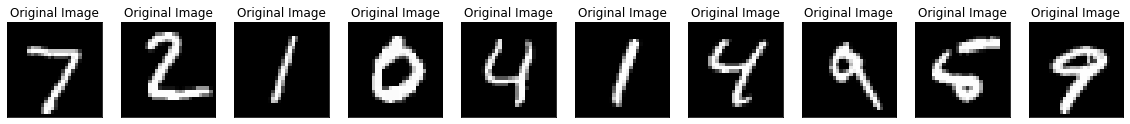

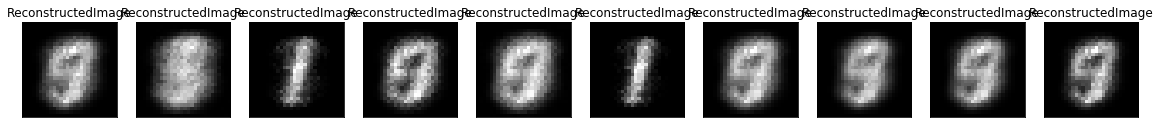

With the addition of noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 42us/step - loss: 0.5655 - val_loss: 0.5606
Epoch 2/2
60000/60000 [==============================] - 3s 48us/step - loss: 0.5596 - val_loss: 0.5585


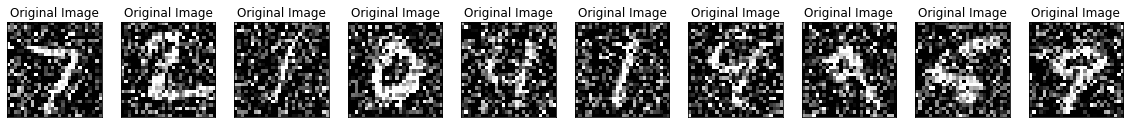

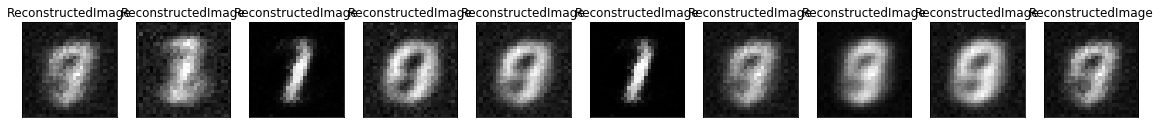

Without the addition of  noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 36us/step - loss: 0.2320 - val_loss: 0.2244
Epoch 2/2
60000/60000 [==============================] - 2s 38us/step - loss: 0.2226 - val_loss: 0.2187


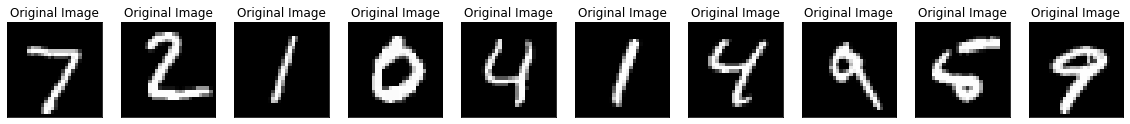

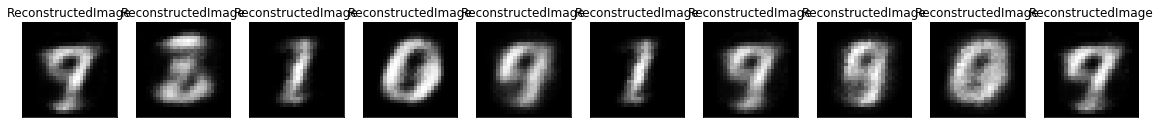

With the addition of noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 51us/step - loss: 0.5571 - val_loss: 0.5537
Epoch 2/2
60000/60000 [==============================] - 4s 59us/step - loss: 0.5531 - val_loss: 0.5524


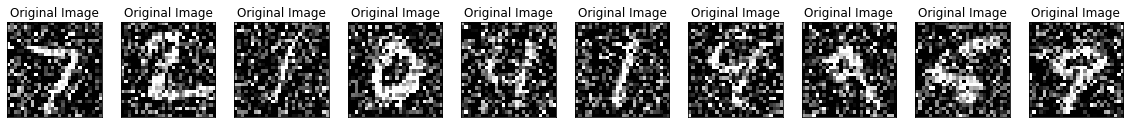

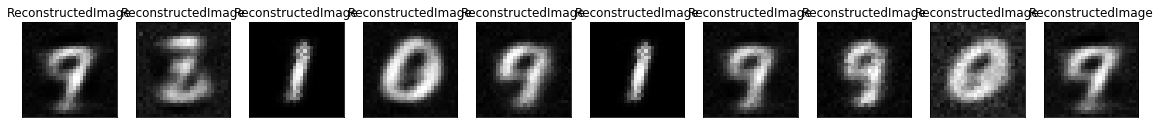

Without the addition of  noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 55us/step - loss: 0.2081 - val_loss: 0.2001
Epoch 2/2
60000/60000 [==============================] - 3s 54us/step - loss: 0.1955 - val_loss: 0.1936


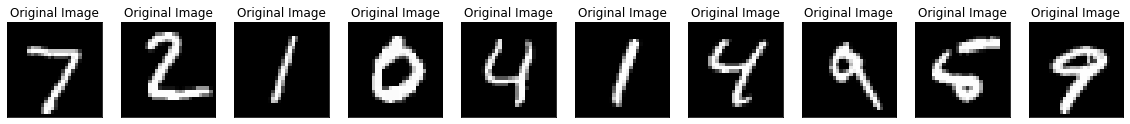

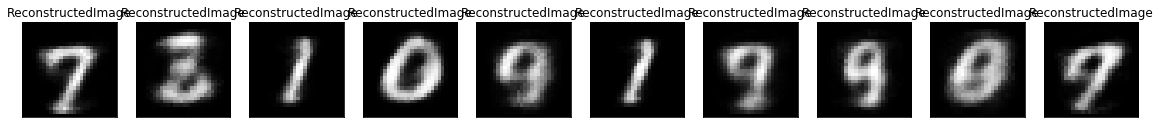

With the addition of noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 4s 59us/step - loss: 0.5504 - val_loss: 0.5473
Epoch 2/2
60000/60000 [==============================] - 4s 59us/step - loss: 0.5464 - val_loss: 0.5450


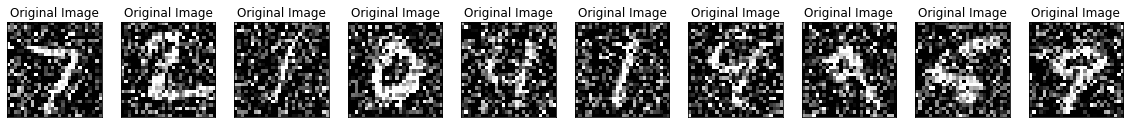

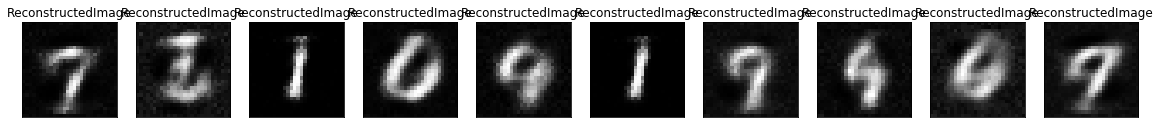

Without the addition of  noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 53us/step - loss: 0.1832 - val_loss: 0.1752
Epoch 2/2
60000/60000 [==============================] - 3s 54us/step - loss: 0.1745 - val_loss: 0.1749


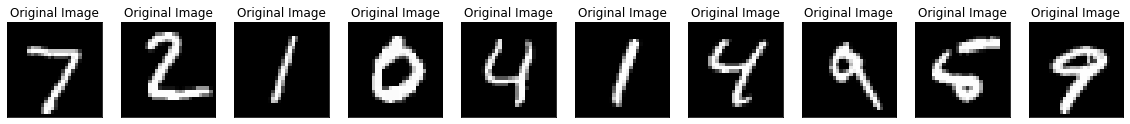

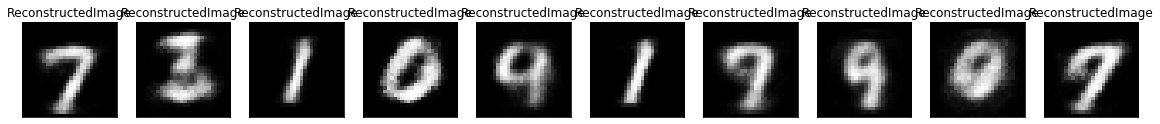

With the addition of noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 43us/step - loss: 0.5450 - val_loss: 0.5425
Epoch 2/2
60000/60000 [==============================] - 3s 46us/step - loss: 0.5419 - val_loss: 0.5405


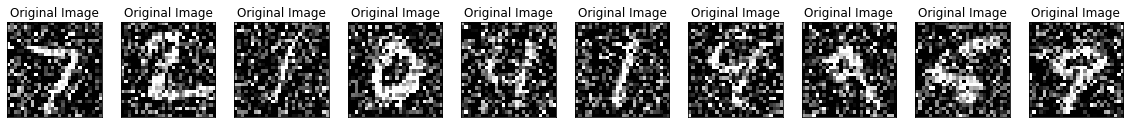

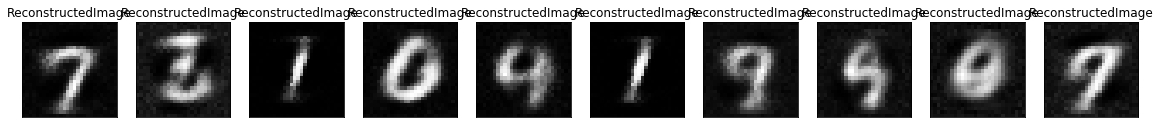

Without the addition of  noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 39us/step - loss: 0.1708 - val_loss: 0.1653
Epoch 2/2
60000/60000 [==============================] - 2s 38us/step - loss: 0.1636 - val_loss: 0.1581


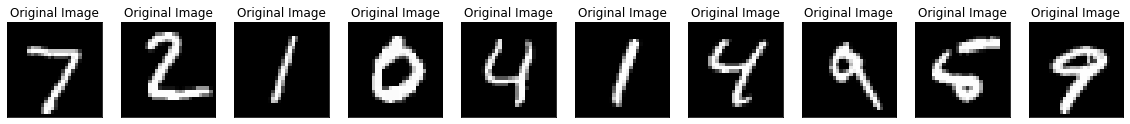

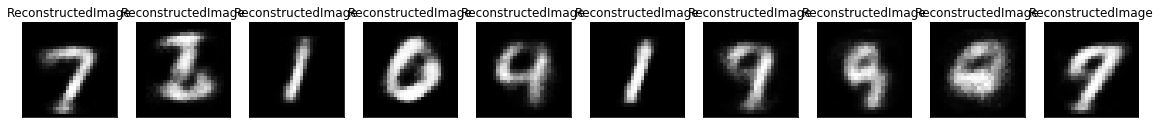

With the addition of noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 43us/step - loss: 0.5415 - val_loss: 0.5400
Epoch 2/2
60000/60000 [==============================] - 3s 54us/step - loss: 0.5387 - val_loss: 0.5376


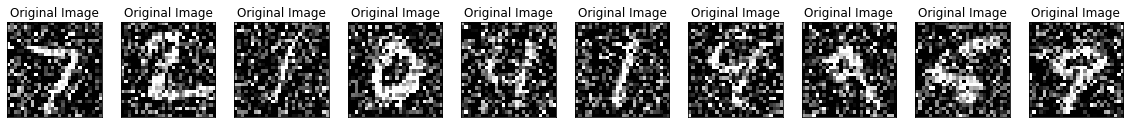

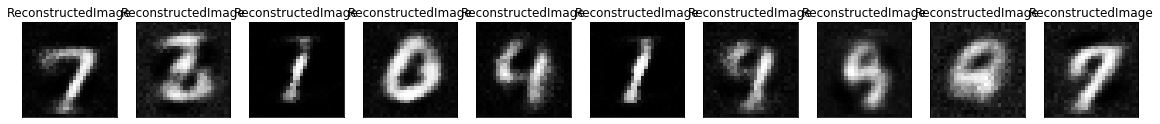

Without the addition of  noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 55us/step - loss: 0.1592 - val_loss: 0.1517
Epoch 2/2
60000/60000 [==============================] - 3s 55us/step - loss: 0.1533 - val_loss: 0.1508


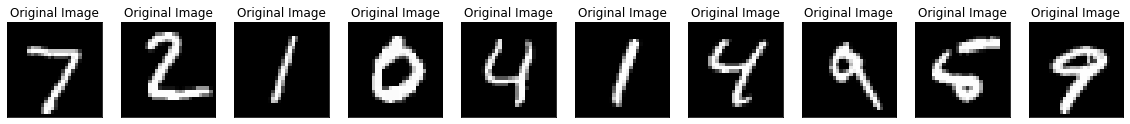

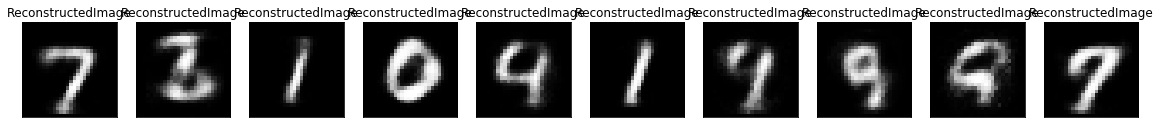

With the addition of noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 58us/step - loss: 0.5387 - val_loss: 0.5365
Epoch 2/2
60000/60000 [==============================] - 3s 57us/step - loss: 0.5363 - val_loss: 0.5358


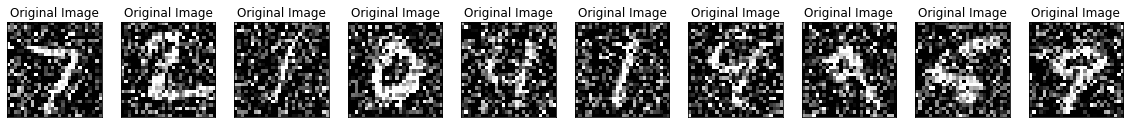

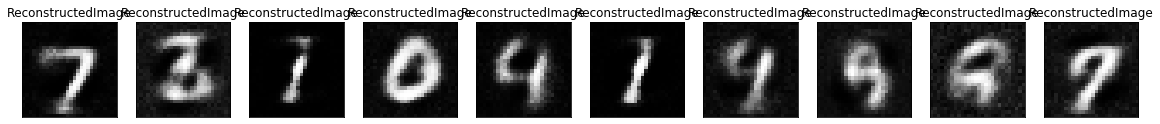

Without the addition of  noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 53us/step - loss: 0.1525 - val_loss: 0.1480
Epoch 2/2
60000/60000 [==============================] - 3s 54us/step - loss: 0.1479 - val_loss: 0.1450


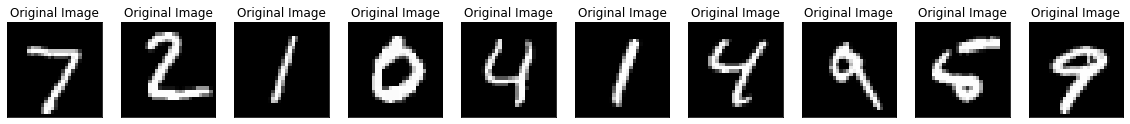

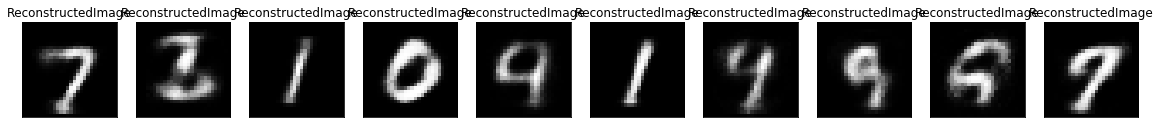

With the addition of noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 57us/step - loss: 0.5370 - val_loss: 0.5355
Epoch 2/2
60000/60000 [==============================] - 3s 56us/step - loss: 0.5349 - val_loss: 0.5338


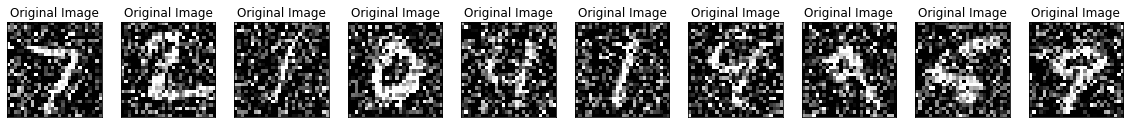

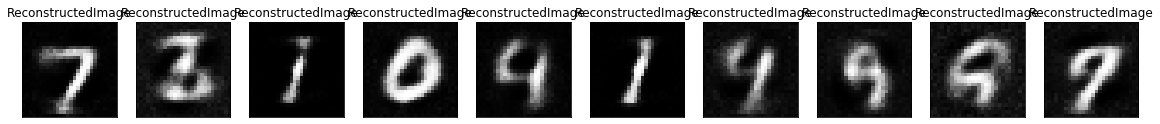

Without the addition of  noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 52us/step - loss: 0.1482 - val_loss: 0.1439
Epoch 2/2
60000/60000 [==============================] - 3s 53us/step - loss: 0.1441 - val_loss: 0.1413


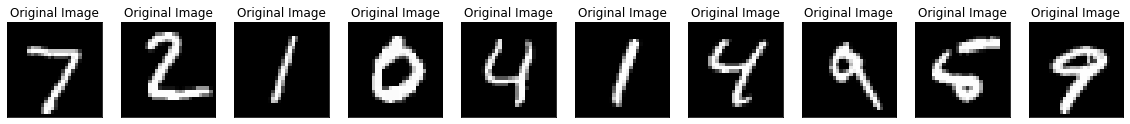

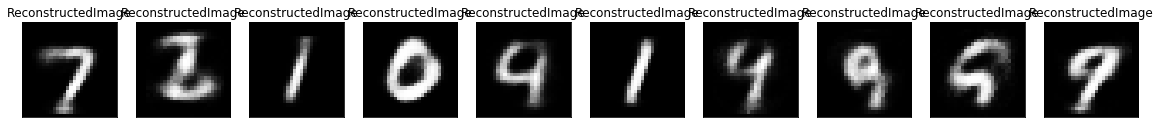

With the addition of noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 54us/step - loss: 0.5358 - val_loss: 0.5339
Epoch 2/2
60000/60000 [==============================] - 2s 34us/step - loss: 0.5340 - val_loss: 0.5331


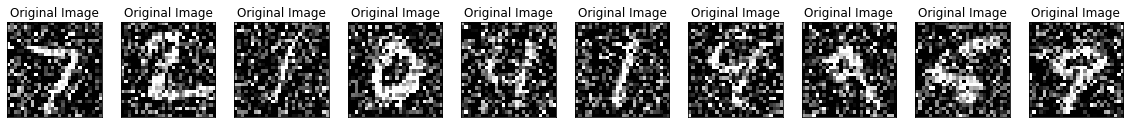

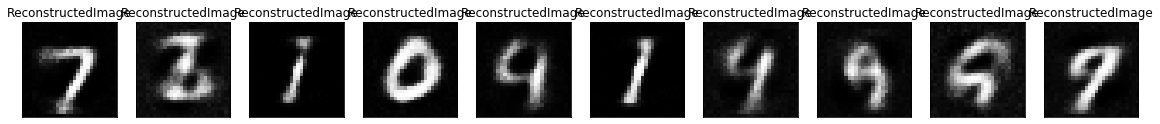

Without the addition of  noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 32us/step - loss: 0.1448 - val_loss: 0.1401
Epoch 2/2
60000/60000 [==============================] - 2s 32us/step - loss: 0.1409 - val_loss: 0.1383


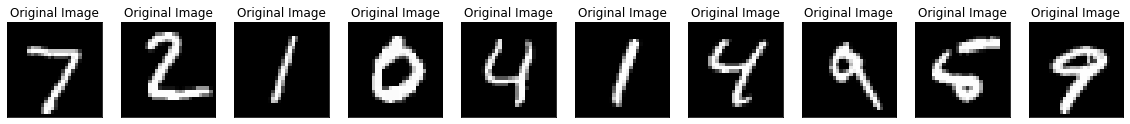

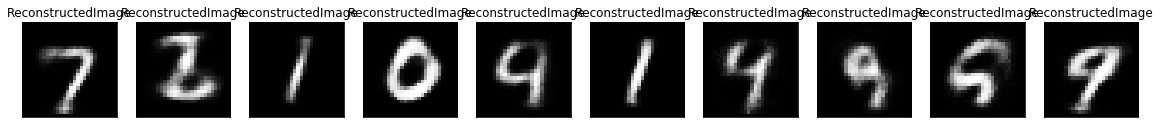

With the addition of noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 37us/step - loss: 0.5348 - val_loss: 0.5331
Epoch 2/2
60000/60000 [==============================] - 2s 37us/step - loss: 0.5330 - val_loss: 0.5322


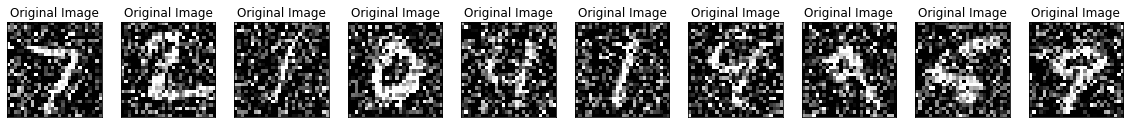

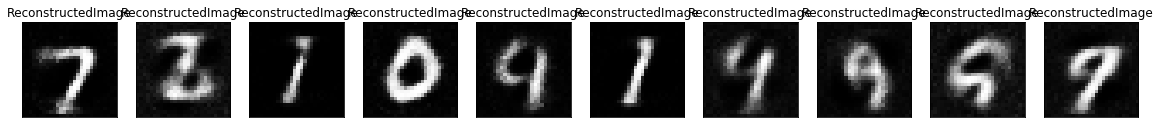

Without the addition of  noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 32us/step - loss: 0.1411 - val_loss: 0.1376
Epoch 2/2
60000/60000 [==============================] - 2s 32us/step - loss: 0.1374 - val_loss: 0.1327


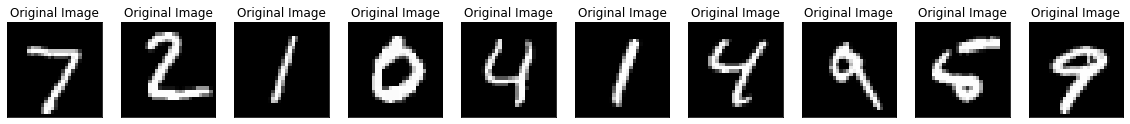

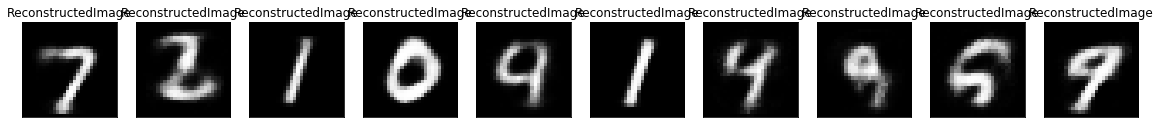

With the addition of noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 36us/step - loss: 0.5336 - val_loss: 0.5324
Epoch 2/2
60000/60000 [==============================] - 2s 36us/step - loss: 0.5318 - val_loss: 0.5311


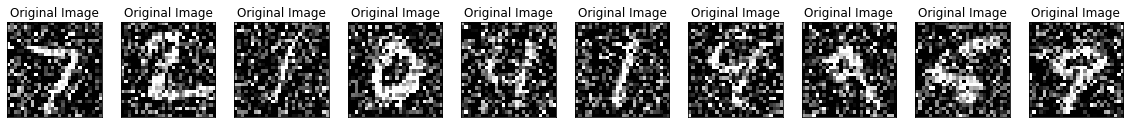

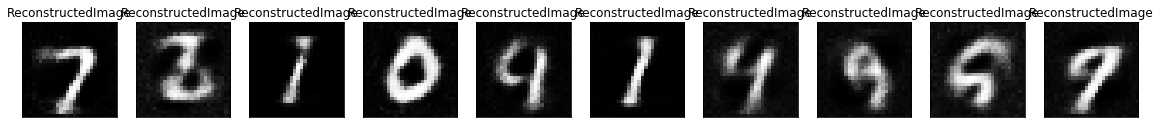

Without the addition of  noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 32us/step - loss: 0.1376 - val_loss: 0.1341
Epoch 2/2
60000/60000 [==============================] - 2s 32us/step - loss: 0.1336 - val_loss: 0.1293


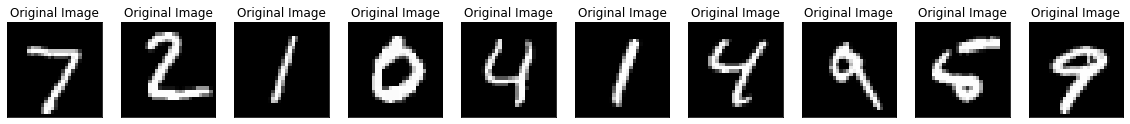

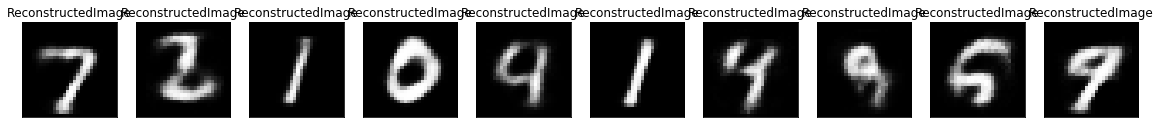

With the addition of noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 36us/step - loss: 0.5326 - val_loss: 0.5308
Epoch 2/2
60000/60000 [==============================] - 2s 36us/step - loss: 0.5308 - val_loss: 0.5303


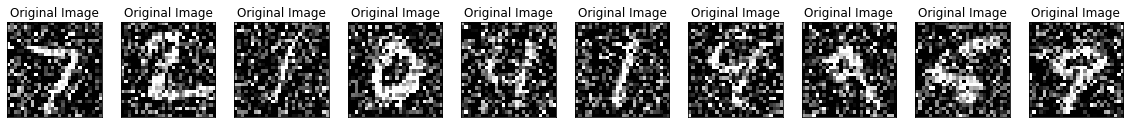

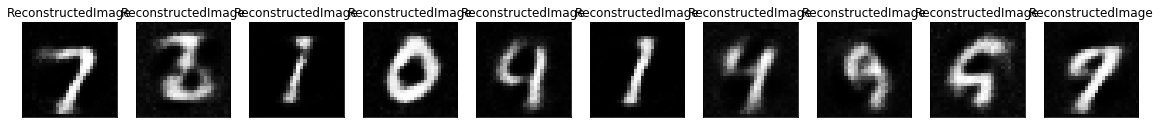

Without the addition of  noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 33us/step - loss: 0.1345 - val_loss: 0.1297
Epoch 2/2
60000/60000 [==============================] - 2s 32us/step - loss: 0.1306 - val_loss: 0.1284


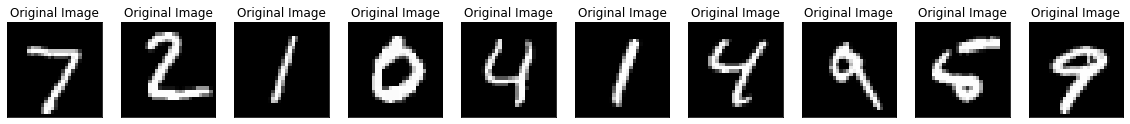

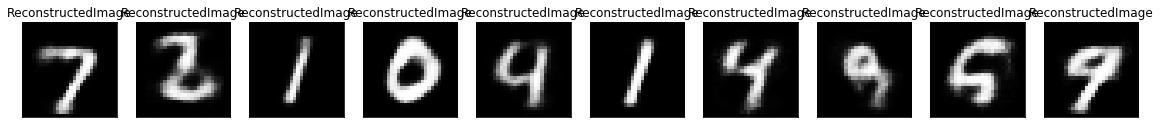

With the addition of noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 36us/step - loss: 0.5316 - val_loss: 0.5305
Epoch 2/2
60000/60000 [==============================] - 2s 36us/step - loss: 0.5298 - val_loss: 0.5290


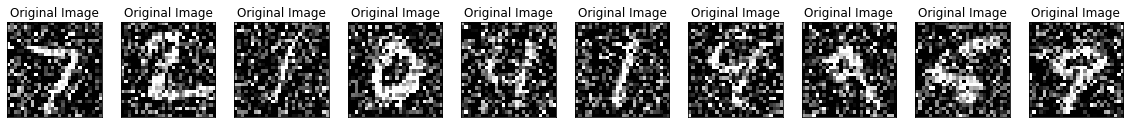

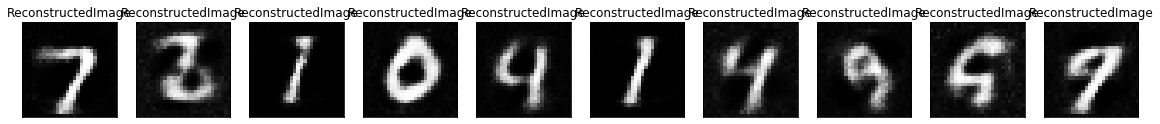

In [10]:

ae_model = create_model()

parameter_combination = {'activation': ['softmax', 'elu',  'relu',],
             'optimizer': ['SGD', 'Adam', ],
             'loss': ['mse','binary_crossentropy']}
for parameter in ParameterGrid(parameter_combination):
  #ae_model.set_params(**parameter)
  history = {}
  print('Without the addition of  noise')
  ae_model.fit(x_train,x_train, epochs = 2, batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
  image_wout_noise = ae_model.predict(x_test)
  image_plot_test(x_test)
  image_plot_recon(image_wout_noise)
  print('With the addition of noise')
  ae_model.fit(x_train_noise,x_train_noise, epochs = 2, batch_size=256,
                shuffle=True,
                validation_data=(x_test_noise, x_test_noise))
  image_with_noise = ae_model.predict(x_test)
  image_plot_test(x_test_noise)
  image_plot_recon(image_with_noise)
  
  
  #pred_image = w_noise.predict(x_test)''''''
  
  #n = 10  # how many digits we will display
  #plt.figure(figsize=(20, 4))
  #for i in range(n):
    # display original
    #ax = plt.subplot(2, n, i + 1)
    #plt.imshow(x_test[i].reshape(28, 28))
    #plt.gray()
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)

    # display reconstruction
    #ax = plt.subplot(2, n, i + 1 + n)
    #plt.imshow(pred_image[i].reshape(28, 28))
    #plt.gray()
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)
  #plt.show()


  


In [0]:
print()

dict_keys(['val_loss', 'loss'])


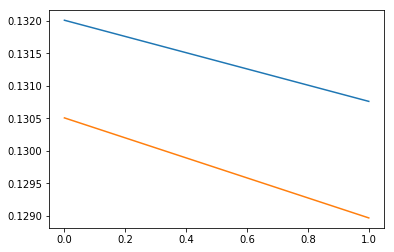

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()